# Определение функций в Python

In [8]:
def my_fun(num):
    num_square = num**2
    return num_square

In [9]:
my_fun(10)

100

In [10]:
my_fun(10.)

100.0

In [11]:
my_fun("10")

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

In [12]:
def my_fun2(num, power=2):
    num_square = num**2
    return num_square

In [13]:
my_fun2(10.)

100.0

In [14]:
my_fun2(10., power=2)

100.0

In [15]:
my_fun2(10., 2)

100.0

In [16]:
my_fun2(power=2, 10.)

SyntaxError: positional argument follows keyword argument (914069931.py, line 1)

# Чистые функции и функции с изменением состояния

Чистая функция
- Поведение детерминировано (внутри нет генератора случайных чисел)
- Не изменяет состояний системы за пределами своей зоны видимости (не изменяет глобальные переменные)
- Не изменяет входные параметры за пределами своей видимости
- Нет выводы результатов на печать, в файлы или порты

In [17]:
def my_fun(num):
    num_square = num**2
    return num_square

In [18]:
my_fun(10.)

100.0

Python разрешает лёгкий доступ к глобальным переменным

Для получения значений требуется ключевое слово `global` и определение функции в локальном контексте

**НО, МОЖНО ИЗМЕНЯТЬ СОСТОЯНИЕ КОСВЕННО!**

In [19]:
this_is_global_variable = 10.

In [20]:
def fun():
    print(this_is_global_variable)

fun()

10.0


In [21]:
def my_fun2(num):
    global this_is_global_variable
    num_square = num**2
    this_is_global_variable = num_square
    return num_square

In [22]:
print(this_is_global_variable)
my_fun2(1.)
print(this_is_global_variable)
my_fun2(12.)
print(this_is_global_variable)

10.0
1.0
144.0


In [23]:
this_is_global_variable = []

In [24]:
def my_fun2(num):
    num_square = num**2
    this_is_global_variable.append(num_square)
    return num_square

In [25]:
print(this_is_global_variable)
my_fun2(1.)
print(this_is_global_variable)
my_fun2(12.)
print(this_is_global_variable)

[]
[1.0]
[1.0, 144.0]


Вывод -- нужен инструмент для изоляции состояний

# Классы и объекты

In [26]:
class MyPowerAlgorithm:

    def __init__(self, power_of_mul=2):
        self.power_of_mul=power_of_mul

    def process(self, number):
        num_square = number**self.power_of_mul
        return num_square
    

In [27]:
alg0 = MyPowerAlgorithm(2)
alg1 = MyPowerAlgorithm(4)

In [28]:
alg0.process(10)

100

In [29]:
alg1.process(10)

10000

In [30]:
ELEM_DICT = {
    1: "H", 2: "He", 3: "Li", 4: "Be", 5: "B", 6: "C", 7: "N", 8: "O", 9: "F", 10: "Ne",
    11: "Na", 12: "Mg", 13: "Al", 14: "Si", 15: "P", 16: "S", 17: "Cl", 18: "Ar", 19: "K", 20: "Ca",
}

In [31]:
class MyMolecule:

    def __init__(self, atom_numbers, atom_positions, comment=""):
        self.atom_numbers = atom_numbers
        self.atom_positions = atom_positions
        self.comment = ""

    def num_of_electrons(self):
        return sum(self.atom_numbers )

    def get_xyz_content(self):
        ret_str = f"{len(self.atom_positions)}\n{self.comment}\n"
        for num, xyz in zip(self.atom_numbers, self.atom_positions):
            ret_str += f"{ELEM_DICT[num]} {xyz[0]} {xyz[1]} {xyz[2]}\n"

        return ret_str

In [32]:
mol = MyMolecule([6,1,1], 
                   [[0.000, 0.000, 0.000],
                    [0.757, 0.586, 0.000],
                    [-0.757, 0.586, 0.000]])

In [33]:
mol.num_of_electrons()

8

In [34]:
mol.get_xyz_content()

'3\n\nC 0.0 0.0 0.0\nH 0.757 0.586 0.0\nH -0.757 0.586 0.0\n'

In [35]:
print(mol.get_xyz_content())

3

C 0.0 0.0 0.0
H 0.757 0.586 0.0
H -0.757 0.586 0.0



In [63]:
class MyPowerAlgorithm: # Класс

    def __init__(self, power_of_mul=2): # Конструктор
        self.power_of_mul=power_of_mul # Присвоение значения аттрибуту класса

    def process(self, number): # Определение метода
        num_square = number**self.power_of_mul
        return num_square

alg0 = MyPowerAlgorithm(2) # Вызов конструктора
print(alg0) # Инстанс объекта / Объект
print(alg0.process) # Метод
print(alg0.power_of_mul) # Аттрибут инстанса объекта

<bound method MyPowerAlgorithm.process of <__main__.MyPowerAlgorithm object at 0x741256d6b2b0>>
2


# Некоторые другие важные вещи

## Импорты

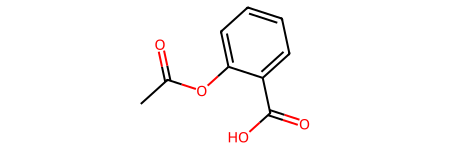

In [50]:
from rdkit import Chem
Chem.MolFromSmiles("CC(=O)OC1=CC=CC=C1C(=O)O")

In [51]:
from example_import import my_fun2

In [52]:
my_fun2(10)

100

In [53]:
MyPowerAlgorithm(2).process(10)

100

In [54]:
from example_import import *

In [55]:
my_fun2(10)

100

In [56]:
MyPowerAlgorithm(2).process(10)

100

In [57]:
import example_import

In [58]:
example_import.my_fun2(10)

100

In [59]:
example_import.MyPowerAlgorithm(2).process(10)

100